# Exercise 4: Hamiltonian replica exchange molecular dynamics (HREMD)

In this exercise, the goal is to run a Hamiltonian replica exchange molecule dynamics (HREMD) simulation for the 4-site system and calculate its solvation free energy. This 4-site system, as shown in the figure below, is composed of 4 linearly-connected interaction sites. It has two metastable states separated by a torsional free energy barrier coupled with the alchemical variable. Specifically,
- In an unbiased simulation in the first alchemical intermediate state, the system is not able to sample both torsional metastable states.
- In an unbiased simulation in the last alchemical intermediate state, the system can sample both torsional metastable states. 

In [1]:
%%bash
# Here we remove the output of the exercise if there is any.
dirs=(state_* dhdl_files)
for dir in "${dirs[@]}"; do
    if ls -d "$dir" >/dev/null 2>&1; then
        rm -rf "$dir"
    fi
done

In [2]:
%%bash
tail -n 18 ../Inputs/4-site/HREMD.mdp

; Free energy calculation
free_energy              = yes
calc-lambda-neighbors    = -1
sc-alpha                 = 0.5
sc-power                 = 1 
couple-moltype           = LIG
couple-lambda0           = vdw
couple-lambda1           = none
couple-intramol          = no
init-lambda-state        = 0

nstdhdl                  = 100
dhdl-print-energy        = total

; lambda-states          = 1      2      3      4      5      6      7      8
coul-lambdas             = 0.00   0.30   0.65   1.00   1.00   1.00   1.00   1.00
vdw-lambdas              = 0.00   0.00   0.00   0.00   0.30   0.60   0.80   1.00
fep-lambdas              = 0.00   0.15   0.30   0.45   0.60   0.75   0.90   1.00


In [3]:
%%bash
module load gromacs/2020.2-cpu openmpi/4.0.5-gcc10.2.0

n=8      # number of alchemical intermediate states
for i in {0..7}
do
    mkdir state_${i} && cd state_${i}
    cp ../../Inputs/4-site/sys.gro .
    cp ../../Inputs/4-site/sys.top .
    cp ../../Inputs/4-site/HREMD.mdp .
    mpirun -np 1 gmx_mpi grompp -f HREMD.mdp -c sys.gro -p sys.top -o HREMD.tpr && cd ../
done

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 29 Mb of data


                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 29 Mb of data



GROMACS reminds you: "Alas, You're Welcome" (Prof. Dumbledore in Potter Puppet Pals)

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    M

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 29 Mb of data


Number of degrees of freedom in T-Coupling group System is 801.00
Estimate for the relative computational load of the PME mesh part: 0.41

GROMACS reminds you: "It is not clear that intelligence has any long-term survival value." (Stephen Hawking)

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 29 Mb of data


                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 29 Mb of data


Number of degrees of freedom in T-Coupling group System is 801.00
Estimate for the relative computational load of the PME mesh part: 0.41

GROMACS reminds you: "I love fools' experiments. I am always making them." (Charles Darwin)

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schu

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 29 Mb of data


Number of degrees of freedom in T-Coupling group System is 801.00
Estimate for the relative computational load of the PME mesh part: 0.41

GROMACS reminds you: "This is extremely unlikely." (Berk Hess)

                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Ale

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 29 Mb of data


                 :-) GROMACS - gmx grompp, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

turning H bonds into constraints...
turning H bonds into constraints...
Analysing residue names:
There are:     1      Other residues
There are:   132      Water residues
Analysing residues not classified as Protein/DNA/RNA/Water and splitting into groups...
Determining Verlet buffer for a tolerance of 0.005 kJ/mol/ps at 300 K
Calculated rlist for 1x1 atom pair-list as 0.704 nm, buffer size 0.004 nm
Set rlist, assuming 4x4 atom pair-list, to 0.700 nm, buffer size 0.000 nm
Note that mdrun will redetermine rlist based on the actual pair-list setup
Calculating fourier grid dimensions for X Y Z
Using a fourier grid of 14x14x14, spacing 0.113 0.113 0.113
This run will generate roughly 29 Mb of data


Number of degrees of freedom in T-Coupling group System is 801.00
Estimate for the relative computational load of the PME mesh part: 0.41

GROMACS reminds you: "Mathematics is no more computation than typing is literature." (John Allen Paulos)



In [4]:
%%time
%%bash
module load gromacs/2020.2-cpu openmpi/4.0.5-gcc10.2.0
mpirun -np 8 gmx_mpi mdrun -deffnm HREMD -dhdl dhdl.xvg -replex 100 -nex 512 -multidir state_1 state_2 state_3 state_4 state_5 state_6 state_7 state_8 -noappend -ntomp 4

                  :-) GROMACS - gmx mdrun, 2020.2-MODIFIED (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
 

CPU times: user 72.5 ms, sys: 14.2 ms, total: 86.8 ms
Wall time: 12min 48s


In [5]:
%%bash
mkdir dhdl_files && cd dhdl_files
for i in {0..7};
do
    mkdir state_${i}
    cp ../state_${i}/dhdl*xvg state_${i}/.
done

In [18]:
import os
import glob
import natsort
import pymbar
import alchemlyb
import numpy as np
from pymbar.timeseries import detect_equilibration, subsample_correlated_data
from alchemlyb.preprocessing import subsampling
from alchemlyb.estimators import TI, BAR, MBAR
from alchemlyb.parsing.gmx import extract_u_nk, extract_dHdl
from alchemlyb.visualisation import plot_mbar_overlap_matrix 

In [7]:
N = 8      # number of replicas
T = 300    # simulation temperature
dhdl_dir = 'dhdl_files'


folders = [f'{dhdl_dir}/state_{i}' for i in range(N)]
u_nk_data = []
for i in range(N):
    files = glob.glob(os.path.join(folders[i], '*dhdl*xvg*'))
    files = natsort.natsorted(files, reverse=False)
    print(f'  Collecting data for the following files: {", ".join(files)}')
    u_nk = alchemlyb.concat([extract_u_nk(xvg, T=T) for xvg in files])
    u_nk_series = subsampling.u_nk2series(u_nk)
    u_nk, u_nk_series = subsampling._prepare_input(u_nk, u_nk_series, drop_duplicates=True, sort=True)
    u_nk = subsampling.slicing(u_nk, step=1)
    u_nk_series = subsampling.slicing(u_nk_series, step=1)
    
    t, statinef, Neff_max = detect_equilibration(u_nk_series.values)
    u_nk_series_equil, u_nk_equil = u_nk_series[t:], u_nk[t:]
    indices = subsample_correlated_data(u_nk_series_equil, g=statinef)
    preprocessed_u_nk = u_nk_equil.iloc[indices]
    u_nk_data.append(preprocessed_u_nk)

u_nk_data = alchemlyb.concat(u_nk_data)
print('  Fitting MBAR on u_nk ...')
try:
    mbar_stop = False
    mbar = MBAR().fit(u_nk_data)
except pymbar.utils.ParameterError():
    mbar_stop = True
    print("\sum_n W_nk is not equal to 1, probably due to insufficient overlap between states.")
    print("Stop using MBAR ...")

if mbar_stop is False:
    print(f"  MBAR: {mbar.delta_f_.iloc[0, -1]:.4f} +/- {mbar.d_delta_f_.iloc[0, -1]:.4f} kT")    

  Fitting MBAR on u_nk ...


No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


  MBAR: -1.5949 +/- 0.6436 kT


<Axes: >

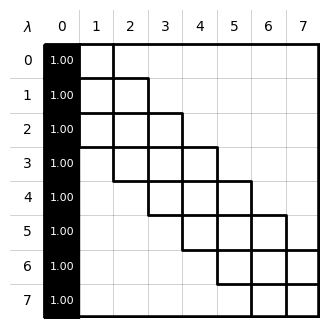

In [11]:
plot_mbar_overlap_matrix(mbar.overlap_matrix)